<a href="https://colab.research.google.com/github/Tejaswini-167/image-processing-lab/blob/main/ImageProcessingLab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

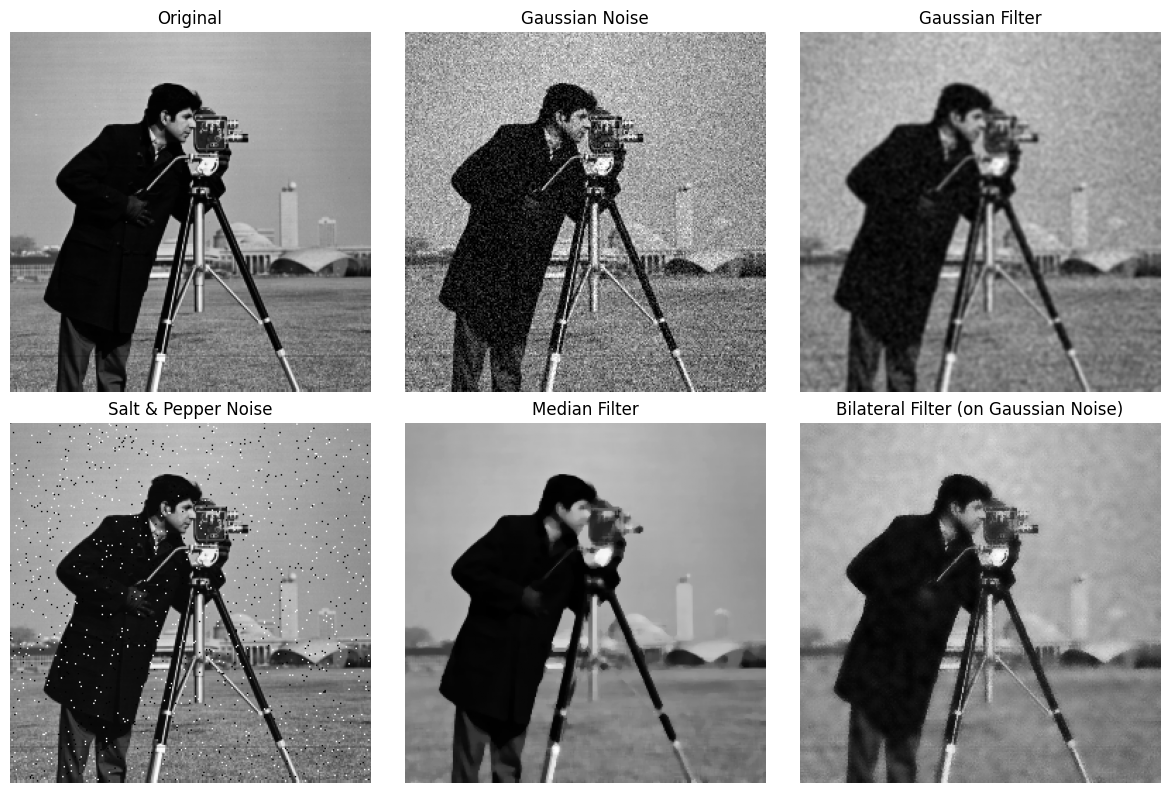

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# ====== Lab Sheet - 3 : Image Filtering and Smoothing ======
# Objective: Reduce noise using filters
# Task: Create a noisy image with Gaussian noise & Salt-and-Pepper noise
#       Apply Gaussian, Median, and Bilateral filters
# Activity: Observe effects of different kernels on noisy images

# ---- Load Grayscale Image ----
image_path = "/content/cameraman_photo.png"   # <-- replace with your dataset image
img = cv2.imread(image_path, 0)

# ---- Function: Add Gaussian Noise ----
def add_gaussian_noise(img, mean=0, sigma=25):
    gaussian = np.random.normal(mean, sigma, img.shape).reshape(img.shape)
    noisy = img + gaussian
    noisy = np.clip(noisy, 0, 255)  # keep in valid range
    return noisy.astype(np.uint8)

# ---- Function: Add Salt & Pepper Noise ----
def add_salt_pepper_noise(img, prob=0.02):
    noisy = np.copy(img)
    total_pixels = img.size
    # Salt (white) noise
    num_salt = int(prob * total_pixels / 2)
    coords = [np.random.randint(0, i-1, num_salt) for i in img.shape]
    noisy[coords[0], coords[1]] = 255
    # Pepper (black) noise
    num_pepper = int(prob * total_pixels / 2)
    coords = [np.random.randint(0, i-1, num_pepper) for i in img.shape]
    noisy[coords[0], coords[1]] = 0
    return noisy

# ---- Create Noisy Images ----
gaussian_noisy = add_gaussian_noise(img)
sp_noisy = add_salt_pepper_noise(img)

# ---- Apply Filters ----
# Gaussian filter
gaussian_filtered = cv2.GaussianBlur(gaussian_noisy, (5,5), 0)
# Median filter
median_filtered = cv2.medianBlur(sp_noisy, 5)
# Bilateral filter (edge-preserving)
bilateral_filtered = cv2.bilateralFilter(gaussian_noisy, 9, 75, 75)

# ---- Display Results ----
plt.figure(figsize=(12,8))  # Adjust height to fit 2 rows better

# Original
plt.subplot(2,3,1), plt.imshow(img, cmap='gray')
plt.title("Original"), plt.axis('off')

# Gaussian Noise + Filtering
plt.subplot(2,3,2), plt.imshow(gaussian_noisy, cmap='gray')
plt.title("Gaussian Noise"), plt.axis('off')
plt.subplot(2,3,3), plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Gaussian Filter"), plt.axis('off')

# Salt & Pepper Noise + Filtering
plt.subplot(2,3,4), plt.imshow(sp_noisy, cmap='gray')
plt.title("Salt & Pepper Noise"), plt.axis('off')
plt.subplot(2,3,5), plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filter"), plt.axis('off')

# Bilateral Filtering
plt.subplot(2,3,6), plt.imshow(bilateral_filtered, cmap='gray')
plt.title("Bilateral Filter (on Gaussian Noise)"), plt.axis('off')

plt.tight_layout()
plt.show()